In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Aaryant31/linearRegression-Practice/main/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X =df.drop('sales', axis=1)

In [5]:
y= df['sales']

In [6]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features

We will go from the equation in the form (shown here as if we only had one x feature):

𝑦̂ =𝛽0+𝛽1𝑥1+𝜖
and create more features from the original x feature for some d degree of polynomial.

𝑦̂ =𝛽0+𝛽1𝑥1+𝛽1𝑥21+...+𝛽𝑑𝑥𝑑1+𝜖
Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of d , the degree of the model. Our metric results on the test set will help us with this!

The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take interaction terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [8]:
poly_object = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
poly_object.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features=poly_object.transform(X)

# train_test_split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train , y_test = train_test_split(poly_features, y,  test_size=.3,random_state=101)

In [13]:
X_train

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [14]:
#creating model
from sklearn.linear_model import LinearRegression

In [15]:
poly_features.shape

(200, 9)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_p=model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mean_absolute_error(y_test,y_p)

0.48967980448037

In [21]:
mean_squared_error(y_test,y_p)

0.4417505510403648

In [22]:
np.sqrt(mean_squared_error(y_test,y_p))

0.6646431757269196

In [23]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [24]:
model.intercept_

5.125557423132507

# choosing degree of polynomial
## adjusting model parameter


### to choose the best degree 
we loop our model to various degree and compare by ploting the RMSE of both Trained data error and test data error

In [25]:
# preprossing data with polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
trained_rmse =[]
test_rmse= []
for my_degree in range(1,7):
    
    poly_ob=PolynomialFeatures(degree=my_degree, include_bias=False)
    poly_feat = poly_ob.fit_transform(X)

    #split testing and train data
    X_train, X_test, y_train , y_test = train_test_split(poly_feat, y,  test_size=.3,random_state=101)

    model=LinearRegression()
    model.fit(X_train,y_train)
    
    #cal pred for both trained and test data

    trained_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    #checking  RMSE for both X_test and X_train

    trained_data_error = np.sqrt(mean_squared_error(y_train,trained_pred))
    test_data_error =np.sqrt(mean_squared_error(y_test,test_pred))
    
    trained_rmse.append(trained_data_error)
    test_rmse.append(test_data_error)


In [27]:
trained_rmse

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993534,
 0.2509342952029336,
 0.19933332834273104]

In [28]:
test_rmse

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742624232109,
 2.5758247603435955,
 4.490868529265006]

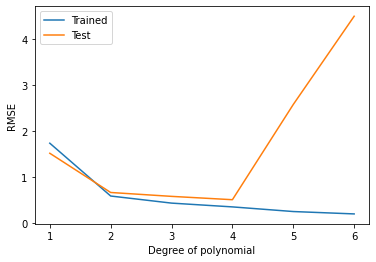

In [52]:
plt.plot(range(1,7),trained_rmse, label="Trained")
plt.plot(range(1,7),test_rmse, label="Test")
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()

# Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [30]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_object = PolynomialFeatures(degree=3,include_bias=False)

In [31]:
final_poly_features= final_poly_object.fit_transform(X)

In [32]:
final_model = LinearRegression()
final_model.fit(final_poly_features,y)

LinearRegression()

In [33]:
y_hat = final_model.predict(final_poly_features)

In [34]:
np.sqrt(mean_squared_error(y,y_hat))

0.46329537474721627

# Saving model and object

In [35]:
from joblib import dump,load

In [36]:
dump(final_poly_object, 'my_poly_object.joblib')

['my_poly_object.joblib']

In [37]:
dump(final_model, 'my_poly_model.joblib')

['my_poly_model.joblib']


## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [38]:
loaded_poly = load('my_poly_object.joblib')
loaded_model = load('my_poly_model.joblib')

In [39]:
campaign = [[149,22,12]]


In [40]:
campaign_poly = loaded_poly.transform(campaign)

In [41]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [42]:
final_model.predict(campaign_poly)

array([14.64501014])